In [159]:
import pandas as pd

In [160]:
data = pd.read_csv("covid_19_data.csv", index_col=0)

In [161]:
data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [162]:
data.Confirmed = data.Confirmed.map(lambda x: int(x))
data.Deaths = data.Deaths.map(lambda x: int(x))
data.Recovered = data.Recovered.map(lambda x: int(x))

In [163]:
data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [164]:
data.columns = ["date", "state", "country", "last_update", "confirmed", "deaths", "recovered"]

In [165]:
data.head()

,date,state,country,last_update,confirmed,deaths,recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [166]:
data.drop(columns=["state"], inplace=True)

In [167]:
continents_mapping = pd.read_csv("continents2.csv")
continents_mapping

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [168]:
mapping_to_sub_region = dict(zip(continents_mapping.name, continents_mapping["sub-region"]))
mapping_to_region = dict(zip(continents_mapping.name, continents_mapping.region))

In [169]:
tmp = []
for x in data.country:
    if x == ' Azerbaijan':
        tmp.append('Azerbaijan')
    elif x == "UK":
        tmp.append("United Kingdom")
    elif x == "US":
        tmp.append("United States")
    elif x == 'Bosnia and Herzegovina':
        tmp.append('Bosnia And Herzegovina')
    elif x == 'Bahamas, The' or x == 'The Bahamas':
        tmp.append("Bahamas")
    elif x == 'Gambia, The' or x == 'The Gambia':
        tmp.append("Gambia")
    elif x == 'Mainland China':
        tmp.append("China")
    elif x == 'Congo (Brazzaville)' or x == 'Congo (Kinshasa)' or x ==  'Republic of the Congo':
        tmp.append("Congo")
    elif x == 'Curacao':
        tmp.append("Curaçao")
    else:
        tmp.append(x)

data.country = tmp

In [170]:
set([x for x in data.country if not x in mapping_to_region])

{"('St. Martin',)",
 'Brunei',
 'Burma',
 'Cape Verde',
 'Channel Islands',
 'Diamond Princess',
 'East Timor',
 'Guinea-Bissau',
 'Ivory Coast',
 'Kosovo',
 'MS Zaandam',
 'Macau',
 'Micronesia',
 'North Ireland',
 'North Macedonia',
 'Others',
 'Palestine',
 'Republic of Ireland',
 'Reunion',
 'Saint Barthelemy',
 'St. Martin',
 'Vatican City',
 'West Bank and Gaza',
 'occupied Palestinian territory'}

In [171]:
mapping_to_region.keys()

dict_keys(['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire, Sint Eustatius and Saba', 'Bosnia And Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo (Democratic Republic Of The)', 'Cook Islands', 'Costa Rica', "Côte D'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Erit

In [172]:
groupped_data = data.groupby(["date", "country"]).agg({"confirmed":"sum", "deaths": "sum", "recovered": "sum"})
groupped_data

confirmed  deaths  recovered
date       country                                         
01/01/2021 Afghanistan             51526    2191      41727
           Albania                 58316    1181      33634
           Algeria                 99897    2762      67395
           Andorra                  8117      84       7463
           Angola                  17568     405      11146
...                                  ...     ...        ...
12/31/2020 Vietnam                  1465      35       1325
           West Bank and Gaza     138004    1400     117183
           Yemen                    2099     610       1394
           Zambia                  20725     388      18660
           Zimbabwe                13867     363      11250

[86779 rows x 3 columns]

In [173]:
groupped_data = groupped_data.reset_index()
groupped_data

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526,2191,41727
1,01/01/2021,Albania,58316,1181,33634
2,01/01/2021,Algeria,99897,2762,67395
3,01/01/2021,Andorra,8117,84,7463
4,01/01/2021,Angola,17568,405,11146
...,...,...,...,...,...
86774,12/31/2020,Vietnam,1465,35,1325
86775,12/31/2020,West Bank and Gaza,138004,1400,117183
86776,12/31/2020,Yemen,2099,610,1394
86777,12/31/2020,Zambia,20725,388,18660


In [174]:
groupped_data.date = pd.to_datetime(groupped_data.date, infer_datetime_format=True)

In [175]:
groupped_data

,date,country,confirmed,deaths,recovered
0,2021-01-01,Afghanistan,51526,2191,41727
1,2021-01-01,Albania,58316,1181,33634
2,2021-01-01,Algeria,99897,2762,67395
3,2021-01-01,Andorra,8117,84,7463
4,2021-01-01,Angola,17568,405,11146
...,...,...,...,...,...
86774,2020-12-31,Vietnam,1465,35,1325
86775,2020-12-31,West Bank and Gaza,138004,1400,117183
86776,2020-12-31,Yemen,2099,610,1394
86777,2020-12-31,Zambia,20725,388,18660


In [176]:
mapping_to_region_lambda = lambda x: mapping_to_region[x] if x in mapping_to_region else "Undefined"

In [177]:
groupped_data["region"] = groupped_data.country.map(mapping_to_region_lambda)

In [178]:
groupped_data["region"].value_counts()

Africa       22356
Asia         20833
Europe       19835
Americas     15706
Undefined     4648
Oceania       3401
Name: region, dtype: int64

In [179]:
mapping_to_sub_region_lambda = lambda x: mapping_to_sub_region[x] if x in mapping_to_sub_region else "Undefined"

In [180]:
groupped_data["sub_region"] = groupped_data.country.map(mapping_to_sub_region_lambda)

In [181]:
groupped_data["sub_region"].value_counts()

Sub-Saharan Africa                 19644
Latin America and the Caribbean    14716
Western Asia                        7734
Southern Europe                     6394
Northern Europe                     4679
Undefined                           4648
Eastern Europe                      4559
South-eastern Asia                  4268
Western Europe                      4203
Southern Asia                       4198
Eastern Asia                        2916
Northern Africa                     2712
Central Asia                        1717
Melanesia                           1304
Northern America                     990
Australia and New Zealand            949
Micronesia                           714
Polynesia                            434
Name: sub_region, dtype: int64

In [182]:
groupped_data.head()

,date,country,confirmed,deaths,recovered,region,sub_region
0,2021-01-01,Afghanistan,51526,2191,41727,Asia,Southern Asia
1,2021-01-01,Albania,58316,1181,33634,Europe,Southern Europe
2,2021-01-01,Algeria,99897,2762,67395,Africa,Northern Africa
3,2021-01-01,Andorra,8117,84,7463,Europe,Southern Europe
4,2021-01-01,Angola,17568,405,11146,Africa,Sub-Saharan Africa


In [183]:
groupped_data = groupped_data.sort_values('date').reset_index(drop=True)
groupped_data

,date,country,confirmed,deaths,recovered,region,sub_region
0,2020-01-22,Japan,2,0,0,Asia,Eastern Asia
1,2020-01-22,China,547,17,28,Asia,Eastern Asia
2,2020-01-22,Hong Kong,0,0,0,Asia,Eastern Asia
3,2020-01-22,Macau,1,0,0,Undefined,Undefined
4,2020-01-22,South Korea,1,0,0,Asia,Eastern Asia
...,...,...,...,...,...,...,...
86774,2021-05-29,Grenada,161,1,160,Americas,Latin America and the Caribbean
86775,2021-05-29,Guatemala,253837,8121,232359,Americas,Latin America and the Caribbean
86776,2021-05-29,Guinea,23172,161,20971,Africa,Sub-Saharan Africa
86777,2021-05-29,Diamond Princess,712,13,699,Undefined,Undefined


In [184]:
groupped_data.deaths.value_counts()

0        11054
1         2173
2         1753
3         1350
7         1212
         ...  
17355        1
49348        1
12361        1
28725        1
8121         1
Name: deaths, Length: 15750, dtype: int64

In [185]:
groupped_data.head(100)

,date,country,confirmed,deaths,recovered,region,sub_region
0,2020-01-22,Japan,2,0,0,Asia,Eastern Asia
1,2020-01-22,China,547,17,28,Asia,Eastern Asia
2,2020-01-22,Hong Kong,0,0,0,Asia,Eastern Asia
3,2020-01-22,Macau,1,0,0,Undefined,Undefined
4,2020-01-22,South Korea,1,0,0,Asia,Eastern Asia
...,...,...,...,...,...,...,...
95,2020-01-28,Hong Kong,8,0,0,Asia,Eastern Asia
96,2020-01-28,Kiribati,0,0,0,Oceania,Micronesia
97,2020-01-28,Singapore,7,0,0,Asia,South-eastern Asia
98,2020-01-28,Malaysia,4,0,0,Asia,South-eastern Asia


In [186]:
len(groupped_data.date == "2020-01-22")

86779

In [187]:
len(groupped_data.date == "2020-01-25")

86779

In [188]:
groupped_data.groupby('date').size()

date
2020-01-22      9
2020-01-23     17
2020-01-24     12
2020-01-25     15
2020-01-26     16
             ... 
2021-05-25    194
2021-05-26    194
2021-05-27    194
2021-05-28    194
2021-05-29    194
Length: 494, dtype: int64

In [189]:
max(groupped_data.groupby('date').size())

194

In [190]:
groupped_data.head()

,date,country,confirmed,deaths,recovered,region,sub_region
0,2020-01-22,Japan,2,0,0,Asia,Eastern Asia
1,2020-01-22,China,547,17,28,Asia,Eastern Asia
2,2020-01-22,Hong Kong,0,0,0,Asia,Eastern Asia
3,2020-01-22,Macau,1,0,0,Undefined,Undefined
4,2020-01-22,South Korea,1,0,0,Asia,Eastern Asia


In [191]:
import numpy as np
from tqdm import tqdm

tmp = []
existing_dates = set(groupped_data.date)
existing_countries = set(groupped_data.country)
for date in tqdm(existing_dates):
    current_countries = set(groupped_data[groupped_data.date == date].country)
    for country in existing_countries:
        if country not in current_countries:
            tmp.append([date, country, np.NaN, np.NaN, np.NaN,
                                  mapping_to_region_lambda(country), mapping_to_sub_region_lambda(country)])

100%|██████████| 494/494 [00:00<00:00, 1210.78it/s]


In [192]:
len(existing_countries)

221

In [193]:
filled_data = pd.concat([groupped_data, pd.DataFrame(tmp, columns=groupped_data.columns)], ignore_index=True)

In [194]:
filled_data.sort_values('date')

,date,country,confirmed,deaths,recovered,region,sub_region
0,2020-01-22,Japan,2.0,0.0,0.0,Asia,Eastern Asia
104280,2020-01-22,MS Zaandam,NaN,NaN,NaN,Undefined,Undefined
104279,2020-01-22,Chad,NaN,NaN,NaN,Africa,Sub-Saharan Africa
104278,2020-01-22,Monaco,NaN,NaN,NaN,Europe,Western Europe
104277,2020-01-22,Channel Islands,NaN,NaN,NaN,Undefined,Undefined
...,...,...,...,...,...,...,...
86726,2021-05-29,Benin,8058.0,101.0,7893.0,Africa,Sub-Saharan Africa
86725,2021-05-29,Belize,12791.0,324.0,12378.0,Americas,Latin America and the Caribbean
86724,2021-05-29,Belgium,1059763.0,24921.0,0.0,Europe,Western Europe
86735,2021-05-29,Iceland,6555.0,29.0,6476.0,Europe,Northern Europe


In [195]:
filled_data.groupby('date').size()

date
2020-01-22    221
2020-01-23    221
2020-01-24    221
2020-01-25    221
2020-01-26    221
             ... 
2021-05-25    221
2021-05-26    221
2021-05-27    221
2021-05-28    221
2021-05-29    221
Length: 494, dtype: int64

In [198]:
filled_data = filled_data.sort_values('date')

In [199]:
filled_data = filled_data.reset_index(drop=True)
filled_data

,date,country,confirmed,deaths,recovered,region,sub_region
0,2020-01-22,Japan,2.0,0.0,0.0,Asia,Eastern Asia
1,2020-01-22,MS Zaandam,NaN,NaN,NaN,Undefined,Undefined
2,2020-01-22,Chad,NaN,NaN,NaN,Africa,Sub-Saharan Africa
3,2020-01-22,Monaco,NaN,NaN,NaN,Europe,Western Europe
4,2020-01-22,Channel Islands,NaN,NaN,NaN,Undefined,Undefined
...,...,...,...,...,...,...,...
109169,2021-05-29,Benin,8058.0,101.0,7893.0,Africa,Sub-Saharan Africa
109170,2021-05-29,Belize,12791.0,324.0,12378.0,Americas,Latin America and the Caribbean
109171,2021-05-29,Belgium,1059763.0,24921.0,0.0,Europe,Western Europe
109172,2021-05-29,Iceland,6555.0,29.0,6476.0,Europe,Northern Europe


In [214]:
for country in existing_countries:
    country_subsample = filled_data[filled_data.country == country]
    country_subsample.confirmed.interpolate(limit_direction="forward", inplace=True)
    country_subsample.deaths.interpolate(limit_direction="forward", inplace=True)
    country_subsample.recovered.interpolate(limit_direction="forward", inplace=True)

C:\Users\pogre\AppData\Local\Temp\ipykernel_15496\815938179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_subsample.confirmed.interpolate(limit_direction="forward", inplace=True)
C:\Users\pogre\AppData\Local\Temp\ipykernel_15496\815938179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_subsample.deaths.interpolate(limit_direction="forward", inplace=True)
C:\Users\pogre\AppData\Local\Temp\ipykernel_15496\815938179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [215]:
filled_data

,date,country,confirmed,deaths,recovered,region,sub_region
0,2020-01-22,Japan,2.0,0.0,0.0,Asia,Eastern Asia
1,2020-01-22,MS Zaandam,NaN,NaN,NaN,Undefined,Undefined
2,2020-01-22,Chad,NaN,NaN,NaN,Africa,Sub-Saharan Africa
3,2020-01-22,Monaco,NaN,NaN,NaN,Europe,Western Europe
4,2020-01-22,Channel Islands,NaN,NaN,NaN,Undefined,Undefined
...,...,...,...,...,...,...,...
109169,2021-05-29,Benin,8058.0,101.0,7893.0,Africa,Sub-Saharan Africa
109170,2021-05-29,Belize,12791.0,324.0,12378.0,Americas,Latin America and the Caribbean
109171,2021-05-29,Belgium,1059763.0,24921.0,0.0,Europe,Western Europe
109172,2021-05-29,Iceland,6555.0,29.0,6476.0,Europe,Northern Europe


In [219]:
full_data = filled_data.fillna(0)
full_data

,date,country,confirmed,deaths,recovered,region,sub_region
0,2020-01-22,Japan,2.0,0.0,0.0,Asia,Eastern Asia
1,2020-01-22,MS Zaandam,0.0,0.0,0.0,Undefined,Undefined
2,2020-01-22,Chad,0.0,0.0,0.0,Africa,Sub-Saharan Africa
3,2020-01-22,Monaco,0.0,0.0,0.0,Europe,Western Europe
4,2020-01-22,Channel Islands,0.0,0.0,0.0,Undefined,Undefined
...,...,...,...,...,...,...,...
109169,2021-05-29,Benin,8058.0,101.0,7893.0,Africa,Sub-Saharan Africa
109170,2021-05-29,Belize,12791.0,324.0,12378.0,Americas,Latin America and the Caribbean
109171,2021-05-29,Belgium,1059763.0,24921.0,0.0,Europe,Western Europe
109172,2021-05-29,Iceland,6555.0,29.0,6476.0,Europe,Northern Europe


In [234]:
full_data = full_data.sort_values(['date', 'country'])

<AxesSubplot:>

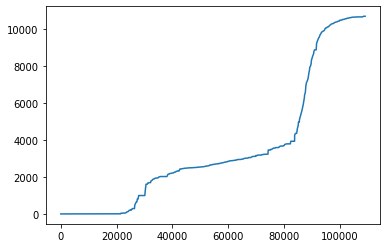

In [235]:
import matplotlib.pyplot as plt

full_data[full_data.country == 'South Sudan'].confirmed.plot()

In [236]:
full_data.to_csv("augmented_covid_19.csv", index=None)